In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
data = pd.read_csv("../data/car_fuel_efficiency.csv")
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [8]:
data.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [10]:
data.describe(include='all')

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9704,9704,9704,9202.000000,9704.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Europe,Gasoline,All-wheel drive,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,3254,4898,4876,NaN,NaN
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,NaN,NaN,NaN,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,NaN,NaN,NaN,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,NaN,NaN,NaN,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,NaN,NaN,NaN,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,NaN,NaN,NaN,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,NaN,NaN,NaN,1.000000,16.707965


In [13]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
numerical_cols

['engine_displacement',
 'num_cylinders',
 'horsepower',
 'vehicle_weight',
 'acceleration',
 'model_year',
 'num_doors',
 'fuel_efficiency_mpg']

In [14]:
categorical_cols = data.select_dtypes(exclude=np.number).columns.tolist()
categorical_cols

['origin', 'fuel_type', 'drivetrain']

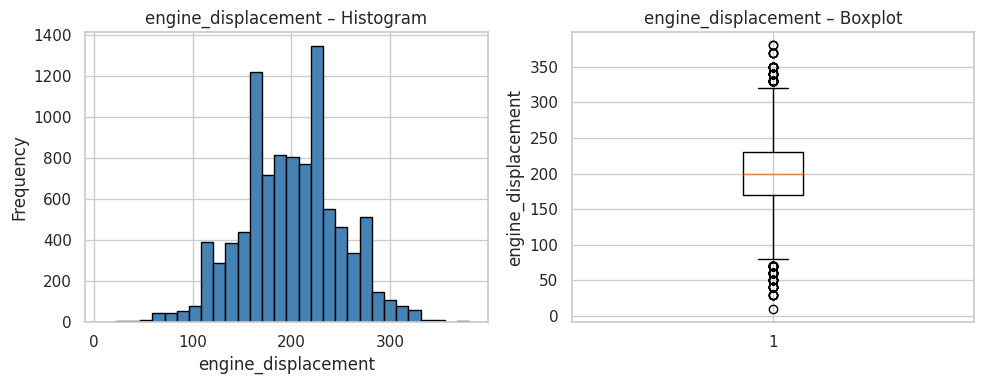

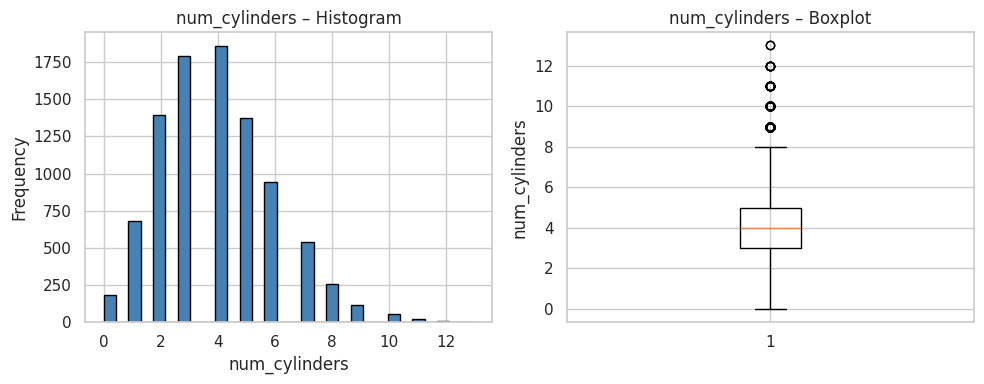

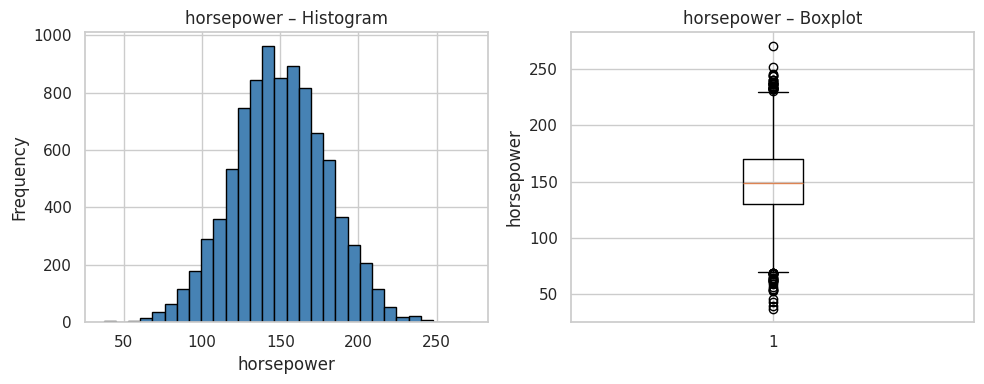

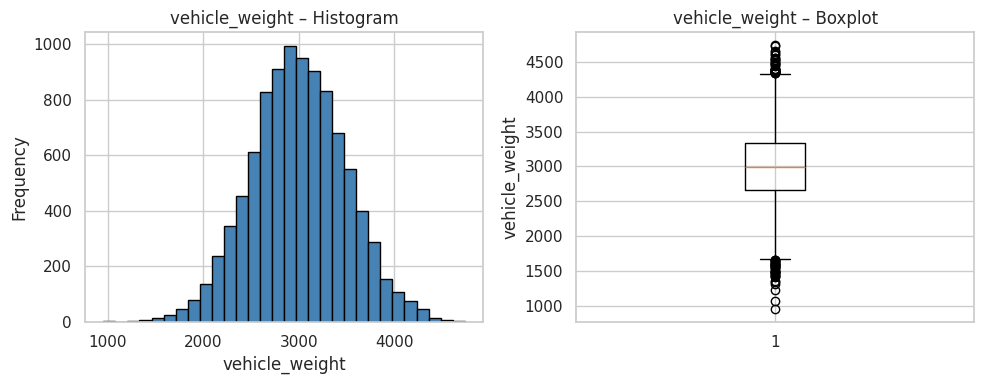

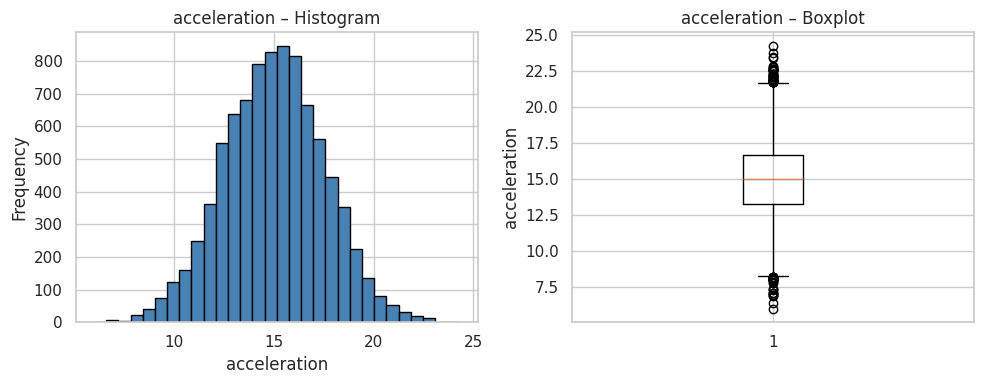

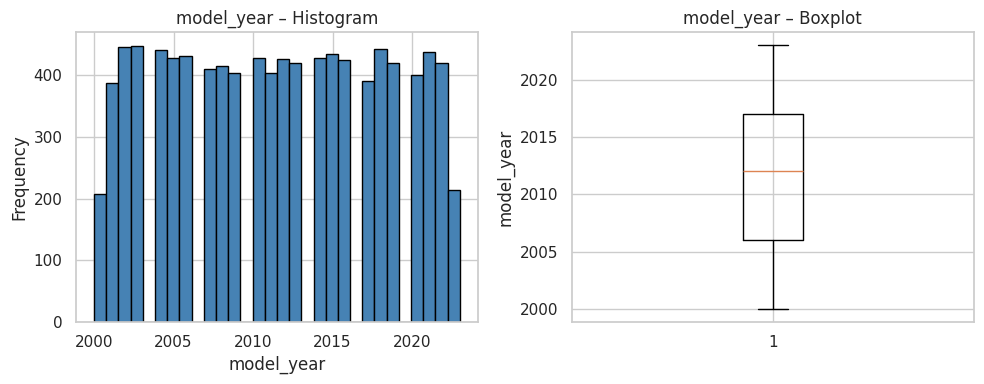

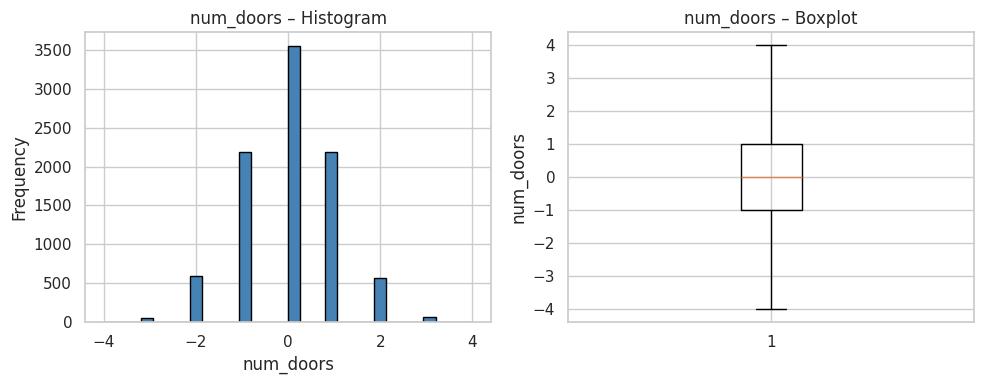

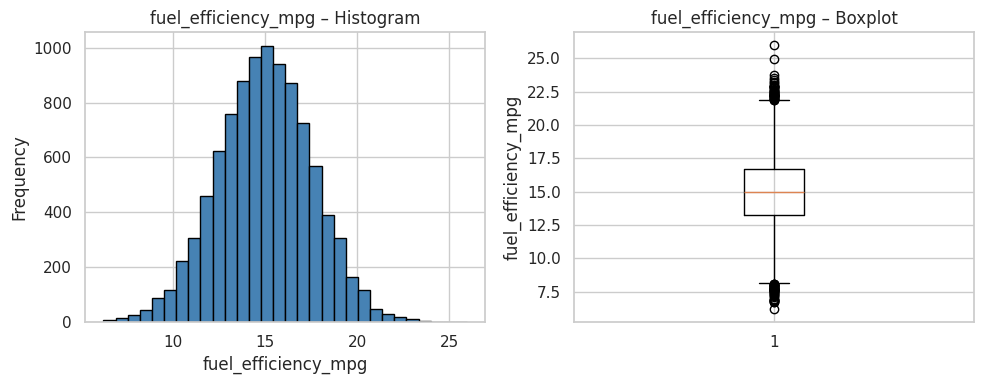

In [18]:
for col in numerical_cols:
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    # Histogram
    ax[0].hist(data[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    ax[0].set_title(f'{col} – Histogram')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')
    # Boxplot
    ax[1].boxplot(data[col].dropna(), vert=True)
    ax[1].set_title(f'{col} – Boxplot')
    ax[1].set_ylabel(col)
    plt.tight_layout()
    plt.show()

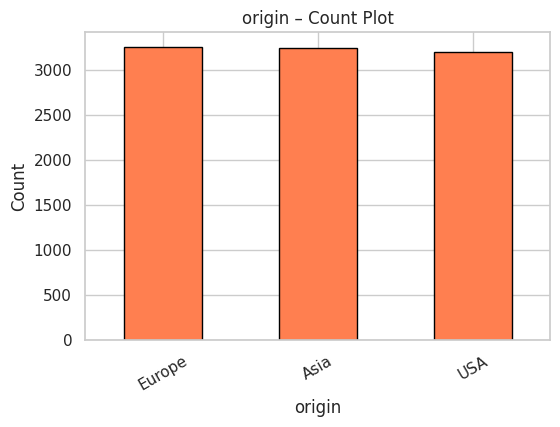

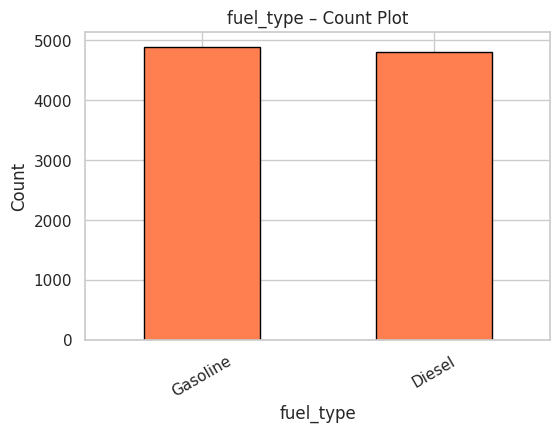

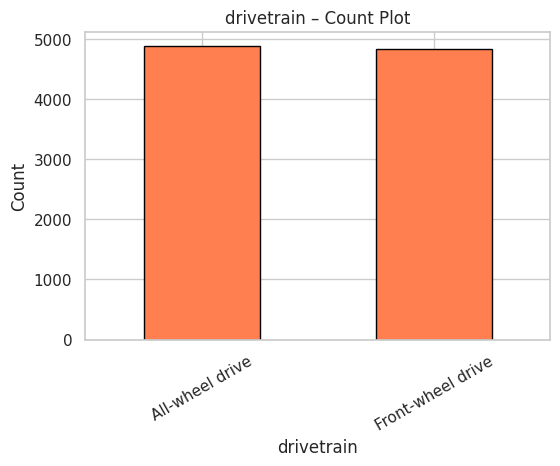

In [16]:
for col in categorical_cols:
    counts = data[col].value_counts(dropna=False)
    plt.figure(figsize=(6,4))
    counts.plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'{col} – Count Plot')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=30)
    plt.show()

In [22]:
data['fuel_type'].unique()

array(['Gasoline', 'Diesel'], dtype=object)

In [24]:
data[data['origin'] == 'Asia']['fuel_efficiency_mpg'].max()

np.float64(23.759122836520497)

In [25]:
data['horsepower'].median()

np.float64(149.0)